In [1]:
import numpy as np 
import pandas as pd
import os
import re
import cv2
import time
import random
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from skimage.feature import hog
from tqdm import tqdm

In [2]:
PATH="../input/final-final-dataset/dataset"
image_height=128
image_width=64
data=[]
labels=[]

In [3]:
t1=time.time()

In [4]:
for dirname,_, filenames in tqdm(os.walk(PATH)):
    for filename in filenames:
        image = cv2.imread(os.path.join(dirname, filename))
        image= cv2.resize(image ,(image_width,image_height))
        labels.append(dirname.split("/")[-1])
        data.append(image)

153it [00:18,  8.45it/s]


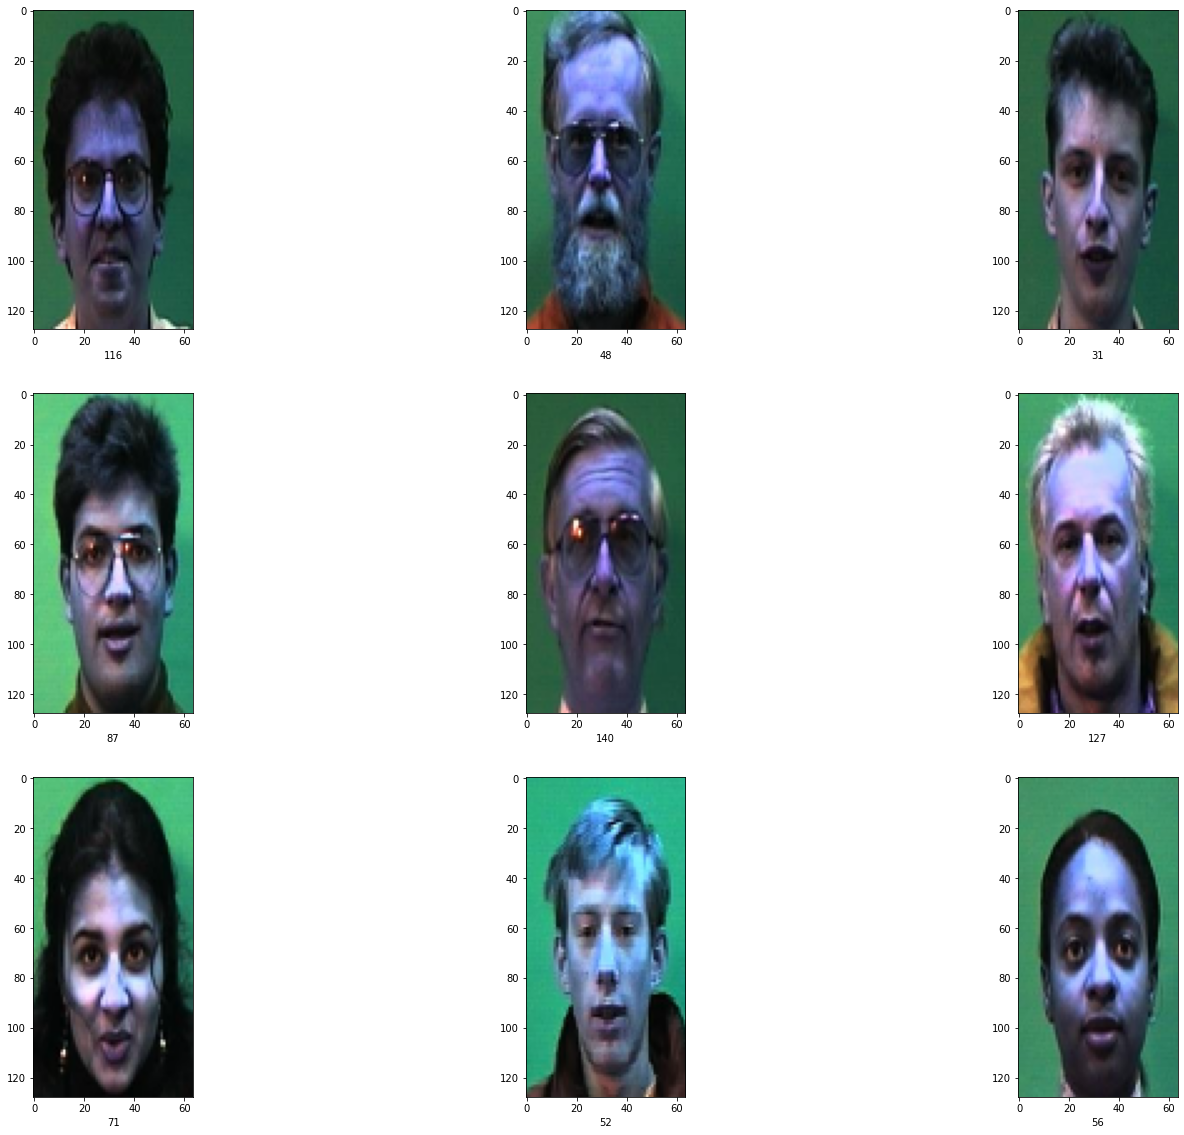

In [5]:
fig = plt.figure(figsize=(25,20))
for i in range(1,10):
    index = random.randint(0,3019) #https://www.pythoncentral.io/how-to-generate-a-random-number-in-python/
    plt.subplot(3,3,i)
    plt.imshow(data[index])
    plt.xlabel(labels[index].split("_")[0])
plt.show()

In [6]:
label_encoder = LabelEncoder()
Labels= label_encoder.fit_transform(labels)

In [7]:
gray_scale_image = [cv2.cvtColor(data[i] , cv2.COLOR_BGR2GRAY) for i in range(len(data))]

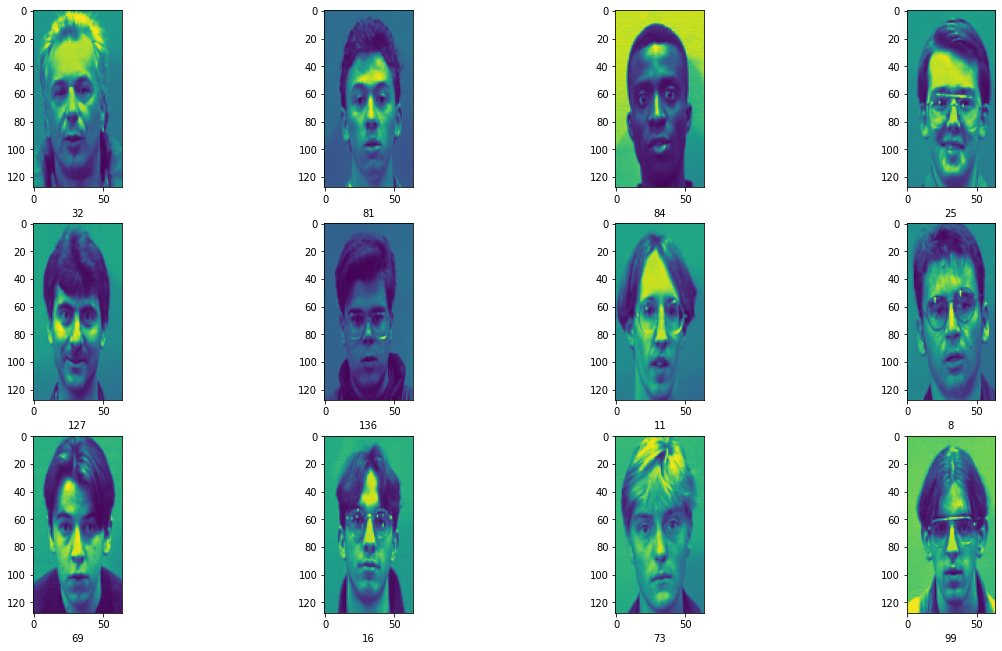

In [8]:
fig = plt.figure(figsize=(20,15))
for i in range(1,13):
    index = random.randint(1,3019) 
    plt.subplot(4,4,i)
    plt.imshow(gray_scale_image[index])
    plt.xlabel(Labels[index])
plt.show()

In [9]:
Labels = np.array(Labels).reshape(len(Labels),1)

In [10]:
pixels_per_cell =8
cell_per_block=4
hog_features=[]
hog_image=[]
for image in tqdm(gray_scale_image):
    fd , hog_im = hog(image , orientations=9 , pixels_per_cell=(pixels_per_cell , pixels_per_cell) , block_norm='L2' , cells_per_block=(cell_per_block,cell_per_block) , visualize=True)
    hog_image.append(hog_im)
    hog_features.append(fd)

100%|██████████| 3040/3040 [01:02<00:00, 48.30it/s]


/opt/conda/lib/python3.7/site-packages/matplotlib/text.py:1215: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


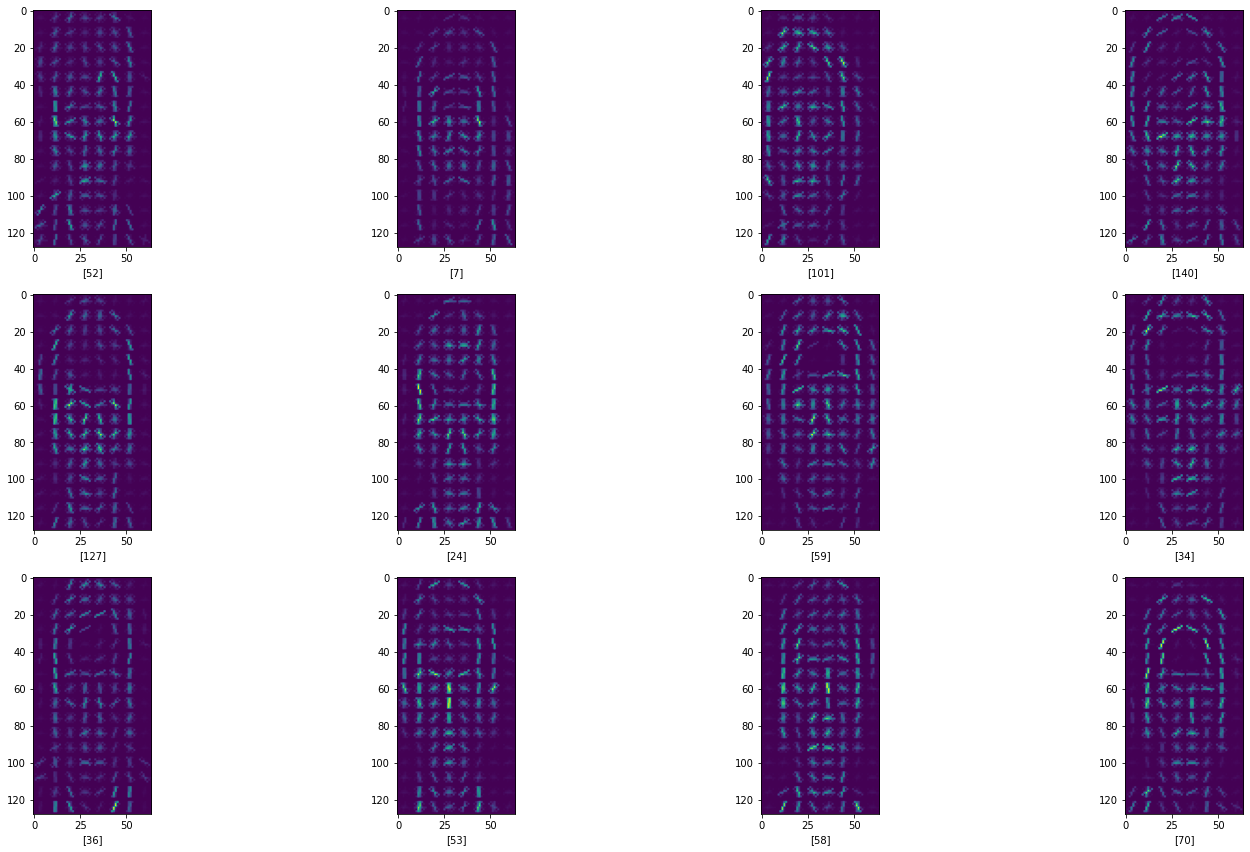

In [11]:
fig = plt.figure(figsize=(25,20))
for i in range(1,13):
    index = random.randint(1,2000)
    plt.subplot(4,4,i)
    plt.imshow(hog_image[index])
    plt.xlabel(Labels[index])
plt.show()

In [12]:
hog_features = np.array(hog_features)
df = np.hstack((hog_features,Labels))

In [13]:
from sklearn.model_selection import train_test_split , GridSearchCV

In [14]:
X_train , X_test , Y_train , Y_test = train_test_split(df[:,:-1] ,df[:,-1],test_size=0.1,random_state=0, stratify=df[:,-1])

In [15]:
from sklearn.decomposition import PCA
t= time.time()
pca = PCA(n_components=150 , svd_solver='randomized' , whiten=True).fit(X_train)
print("Time Taken", time.time()-t)

Time evolved 3.481318712234497


In [16]:
t0 = time.time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("Time Taken:  %0.3fs" % (time.time() - t0))

Time Taken:  0.258s


In [17]:
print("Total Time Taken", (time.time()-t1))

Total Time Taken 179.92008781433105


In [18]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100, random_state=0)
clf.fit(X_train_pca,Y_train)

RandomForestClassifier(random_state=0)

In [19]:
y_pred = clf.predict(X_test_pca)

In [21]:
from sklearn.metrics import confusion_matrix, classification_report ,accuracy_score

In [22]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         2
         1.0       1.00      1.00      1.00         2
         2.0       1.00      1.00      1.00         2
         3.0       1.00      1.00      1.00         2
         4.0       1.00      0.50      0.67         2
         5.0       1.00      1.00      1.00         2
         6.0       1.00      1.00      1.00         2
         7.0       1.00      1.00      1.00         2
         8.0       1.00      1.00      1.00         2
         9.0       1.00      1.00      1.00         2
        10.0       1.00      1.00      1.00         2
        11.0       1.00      1.00      1.00         2
        12.0       1.00      1.00      1.00         2
        13.0       1.00      1.00      1.00         2
        14.0       1.00      1.00      1.00         2
        15.0       1.00      1.00      1.00         2
        16.0       1.00      1.00      1.00         2
        17.0       1.00    

In [23]:
print('Model accuracy score: {0:0.4f}'. format(accuracy_score(Y_test,y_pred)))

Model accuracy score: 0.9967
